Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T08M200c',
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


gil_marin = {
    'h':0.7,
    'omega_b': 0.023,
    'omega_cdm': 0.1093,
    'n_s':0.95,
    'sigma8': 0.7913,
    'tau_reio': 0.0543,
}

simone = {}

lazanu = {
    'h':0.71,
    'omega_b': 0.0226,
    'omega_cdm': 0.11,
    'n_s':0.963,
    'A_s': 2.43e-9,
    'k_pivot': 0.002,
}

planck_2015 = {
    'omega_b' : 0.02226,
    'omega_cdm' : 0.1186,
    'A_s':  2.139e-9,
    'k_pivot': 0.05,
    'n_s': 0.9677,
    'h' : 0.6781
}

battaglia_16 = {
    'h':0.72,
    'Omega_b':0.043,
    'Omega_cdm':0.25-0.043,
    'n_s':0.96,
    'sigma8':0.8
    
}


z_for_pk_hm = 1.
M_min = 1e8
k_max_for_pk_class_sz = 1e2
z_max = 4.

pk_setup = {
'output': 'pk_at_z_1h,pk_at_z_2h,mPk,pk_gg_at_z_1h,pk_gg_at_z_2h',
'M_min' : M_min,
'm_min_counter_terms' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.01,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 2e1,
    
}

factor_sz = 1e-2

ksz_params = {

'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
# 'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'blue',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
# 'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'B16',
'gas profile mode' : 'custom',
'k_min_gas_density_profile':1e-3,
'normalize_gas_density_profile':1,
# 'A_rho0': 4.e3,
# 'A_alpha': 0.88,
# 'A_beta': 3.83,
# fiducial agn values:
#ptsz->A_rho0 = 4.e3;
#ptsz->A_alpha = 0.88;
#ptsz->A_beta = 3.83;
    
    
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'mass_epsrel_ngbar':1e-6,
'dlogell' : 0.1,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
    
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800,
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  100,
'N_kSZ2_gal_theta_grid' :  100,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [4]:
'%.3e\n'%10100000000000.0

'1.010e+13\n'

In [5]:
'%.3e\n'%118000000000000.0

'1.180e+14\n'

# 3D power spectra

In [6]:
zacharegas21_cosmo_redmagic = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'Omega_b': 0.0486,
    'Omega_cdm': 0.341-0.0486,
    'h':  0.6737,
    'tau_reio': 0.0543,
    'sigma8': 0.735,
    'n_s':  0.9649,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}



In [7]:
z_for_pk_hm = 1.
M_min = 1e10
M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'halofit',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()
# M.struct_cleanup()
# M.empty()

In [8]:
M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()

pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()


In [9]:
M = Class()
M.set(ksz_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,mean_galaxy_bias,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'M_min' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
'mass_epsrel':1e-4,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_nfw_profile_satellite_galaxies':1.,
# 'galaxy_sample' : 'custom',
# 'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
# 'delta for galaxies':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'D08',
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'alpha_s_HOD' : 0.0,
# 'M_min_HOD' : 1e11,
# 'M1_prime_HOD' : 1.0,
'gas profile' : 'nfw',
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1
})
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()

# pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()


1.5798937136283233

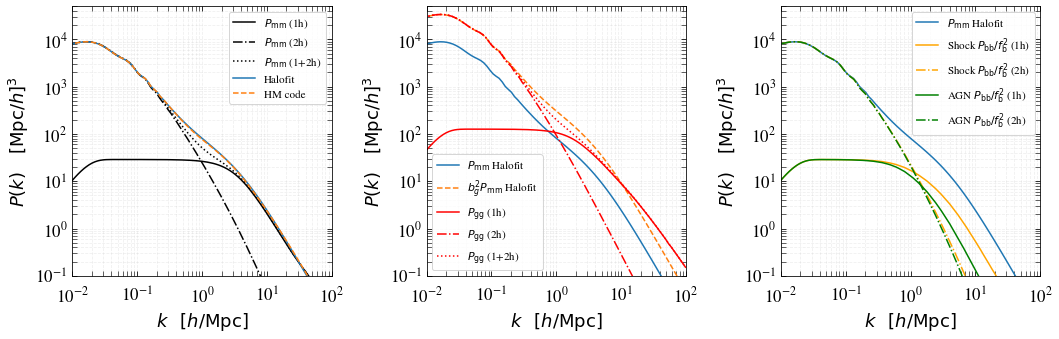

In [22]:
k_arr = np.geomspace(1e-3,5e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ (1h)',c='k',ls='-')
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ (2h)',c='k',ls='-.')
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ (1+2h)',c='k',ls=':')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='Halofit')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code',ls='--')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ Halofit',ls='--')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ (1h)',c='r',ls='-')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ (2h)',c='r',ls='-.')
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ (1+2h)',c='r',ls=':')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='orange',ls='-')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='orange',ls='-.')

ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='g',ls='-')
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='g',ls='-.')


# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['1h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='pink',ls='-')
# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['2h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='pink',ls='-.')




ax.legend(fontsize=11,ncol=1)

fig.tight_layout()
plt.savefig('pks.pdf')

In [38]:
get_truncated_nfw_profile_at_z_k_rd_cd_xout = np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)

    

def get_truncated_nfw_profile_at_z_k_md_xout(z,k,md,xout):
    r200c = M.get_r_delta_of_m_delta_at_z(200,md,z)
    c200c = M.get_c200c_at_m_and_z_D08(md,z)
    return get_truncated_nfw_profile_at_z_k_rd_cd_xout(z,k,r200c,c200c,xout)

get_truncated_nfw_profile_at_z_k_md_xout = np.vectorize(get_truncated_nfw_profile_at_z_k_md_xout)

In [39]:
z = z_for_pk_hm
m200c = 3e14
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
xout = 1.
get_truncated_nfw_profile_at_z_k_rd_cd_xout(z,1e1,r200c,c200c,xout)

array(0.05225824)

In [40]:
get_truncated_nfw_profile_at_z_k_md_xout(z,1e1,m200c,xout)

array(0.05225824)

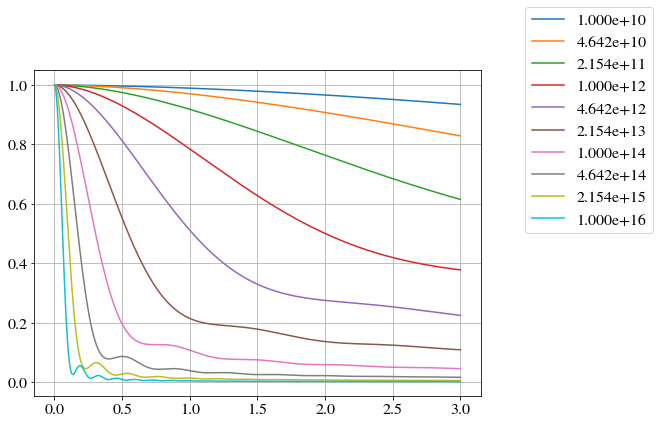

In [41]:
xout_arr = np.linspace(1e-3,3,1000)
for m200ca in np.geomspace(1e10,1e16,10):
    plt.plot(xout_arr,get_truncated_nfw_profile_at_z_k_md_xout(z,1e1,m200ca,xout_arr),label='%.3e'%m200ca)
plt.grid(which='both')
plt.legend(loc=(1.1,0.5))

In [42]:
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
get_ng_bar_2nc_at_z = get_ng_bar_at_z
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)

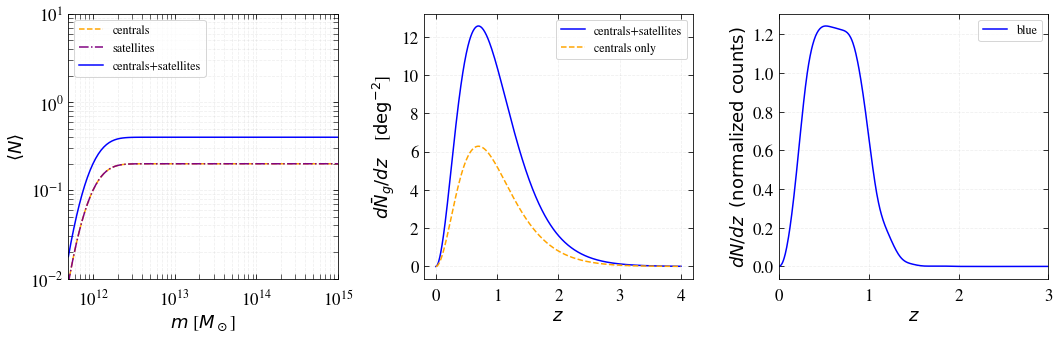

In [43]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
# ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('galaxies.pdf')




In [ ]:
dndM      = get_dndM_class_sz(z,M)
n_per_str = dV * dndM * M * dlnM / (4.*np.pi)   

In [44]:

get_dndlnM_at_z_and_M = np.vectorize(M.get_dndlnM_at_z_and_M)



In [45]:
get_dndlnM_at_z_and_M(0.5,3e14)

array(1.90433941e-06)

# Profiles

In [13]:
M = Class()
M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tSZ_1h,m200m_to_m200c,m200c_to_m200m',
       'concentration parameter':'D08'
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [14]:
M.get_f_b()

0.17199999999999996

total mass of gas within $\lambda r_{200c}$ with $\lambda \in \mathbb{R}$

In [15]:
lambda_min = 0.1
lambda_max = 50
n_lambda = 100
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)

In [129]:
# chose a mass and redshift for a given halo of interest
z = 0.5
m200m = 3e14
# convert to 200c for b16 profile
m200c = 3e14#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

In [130]:
# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)

# normalized radial array for b16:
x_200c = lambda_array

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
rs_200m = r200m/c200m
xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c
# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 

# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 
    

def A_rho0_norm(A_rho0=1.,
                A_alpha = 0.88,
                A_beta = 3.83,
                alpha_m_rho0 = 0.29,
                alpha_m_alpha = -0.03,
                alpha_m_beta = 0.04,
                alpha_z_rho0 = -0.66,
                alpha_z_alpha = 0.19,
                alpha_z_beta = -0.025,
                gamma = -0.2,
                xc = 0.5):
    return M_nfw(1.)/M_b16(1.,A_rho0=1.,
                              A_alpha=A_alpha,
                              A_beta=A_beta,
                              alpha_m_rho0 = alpha_m_rho0,
                              alpha_m_alpha = alpha_m_alpha,
                              alpha_m_beta = alpha_m_beta,
                              alpha_z_rho0 = alpha_z_rho0,
                              alpha_z_alpha = alpha_z_alpha,
                              alpha_z_beta = alpha_z_beta,
                              gamma=gamma,
                              xc = xc)

In [131]:
M_nfw(1.)

array(5.15999349e+13)

In [132]:
print('%.3e'%m200c)
print('%.3e'%r200c)
print('%.3e'%r200m)

3.000e+14
9.320e-01
1.247e+00


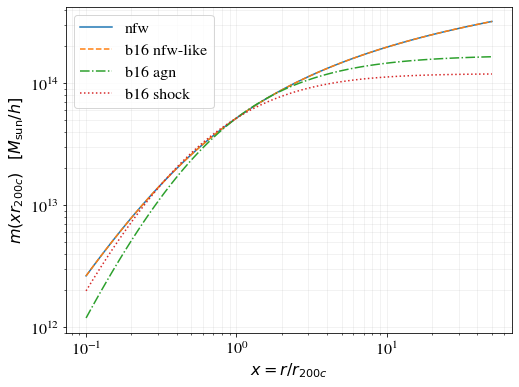

In [133]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
plt.plot(lambda_array,M_nfw(lambda_array),label='nfw')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.

# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 nfw-like',ls='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 agn',ls='-.')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 shock',ls=':')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
plt.xlabel(r'$x=r/r_{200c}$')
plt.legend()
plt.grid(which='both',alpha=0.2)

(0.1, 10.0)

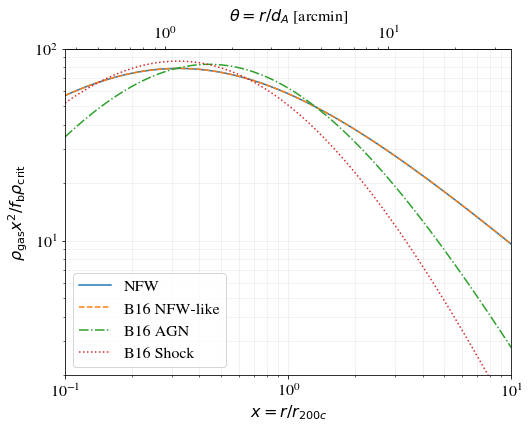

In [134]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_nfw*x_200c**2,label = 'NFW')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 AGN',ls='-.')


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 Shock',ls=':')



ax1.loglog()
ax1.legend()
ax1.set_xlabel(r'$x=r/r_{200c}$')
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$')

plt.grid(which='both',alpha=0.2)
secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ [arcmin]')
ax1.set_ylim(2,1e2)
ax1.set_xlim(1e-1,1e1)




In [136]:
x200c_to_theta_arcmin(1.)

3.571439245653709

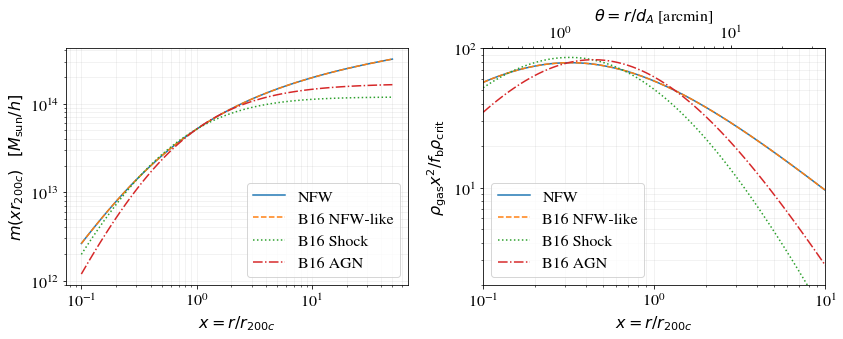

In [135]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))


ax = ax1

ax.plot(lambda_array,M_nfw(lambda_array),label='NFW')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.

# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='B16 NFW-like',ls='--')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='B16 Shock',ls=':')



A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0_norm(A_rho0=A_rho0,
                                               A_alpha=A_alpha,
                                               A_beta=A_beta,
                                               alpha_m_rho0 = alpha_m_rho0,
                                               alpha_m_alpha = alpha_m_alpha,
                                               alpha_m_beta = alpha_m_beta,
                                               alpha_z_rho0 = alpha_z_rho0,
                                               alpha_z_alpha = alpha_z_alpha,
                                               alpha_z_beta = alpha_z_beta,
                                               gamma = gamma,
                                               xc = xc
                                               ),
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='B16 AGN',ls='-.')




ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
ax.set_xlabel(r'$x=r/r_{200c}$')
ax.legend()
ax.grid(which='both',alpha=0.2)


ax = ax2
rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_nfw*x_200c**2,label = 'NFW')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')

A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 Shock',ls=':')




A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 AGN',ls='-.')





ax.loglog()
ax.legend()
ax.set_xlabel(r'$x=r/r_{200c}$')
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$')

ax.grid(which='both',alpha=0.2)
secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ [arcmin]')
ax.set_ylim(2,1e2)
ax.set_xlim(1e-1,1e1)

fig.tight_layout()
plt.savefig('gas_profiles.pdf')


# CMB with tSZ (class_sz) and kSZ (battaglia template)


In [4]:
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()

In [30]:
path_to_noise_curves = path_to_files+'/noise_curves/'
nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_noise_curves + 'SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
nl_advact_l, nl_advact_nl_tt, nl_advact_nl_yy = np.loadtxt(path_to_noise_curves + 'AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',unpack=True)
nl_s4_l, nl_s4_nl_tt, nl_s4_nl_yy = np.loadtxt(path_to_noise_curves +'S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)

In [31]:
nl_advact_l

array([  40.,   41.,   42., ..., 7977., 7978., 7979.])

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_14423/1747691377.py:22: RuntimeWarning: overflow encountered in exp
  Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.


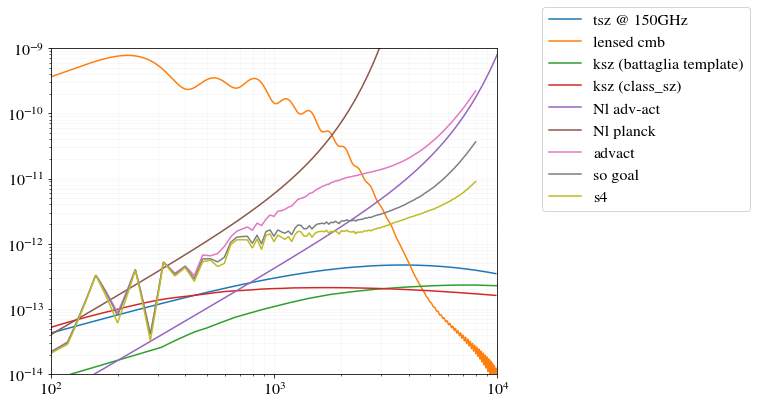

In [7]:
cl_sz = M.cl_sz()
cl_ksz = M.cl_ksz()
plt.plot(cl_sz['ell'],(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))*(M.T_cmb()*1e6)**-2.,label='tsz @ 150GHz')

plt.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
plt.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)')
plt.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),label='ksz (class_sz)')

l_arr = np.geomspace(1e2,5e4,100)
arcmin_to_radians = np.pi/(60.*180.)


DeltaT = 15.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
plt.loglog(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl adv-act')


DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
plt.loglog(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck')


plt.plot(nl_advact_l,nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.,label='advact')
plt.plot(nl_so_goal_l,nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.,label='so goal')
plt.plot(nl_s4_l,nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.,label='s4')




plt.loglog()
plt.legend(loc=(1.1,0.5))
plt.ylim(1e-14,1e-9)
plt.xlim(1e2,1e4)
plt.grid(which='both',alpha=0.1)

# HOD and galaxy distributions

In [13]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'})
M.compute()

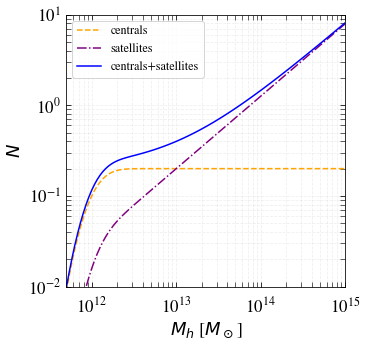

In [14]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

In [15]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'
      })
M.compute()
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'alpha_s_HOD' : 0.
      })
M.compute()
get_ng_bar_2nc_at_z = np.vectorize(M.get_ng_bar_at_z)

In [16]:
z_arr = np.linspace(1e-8,4.,1000)

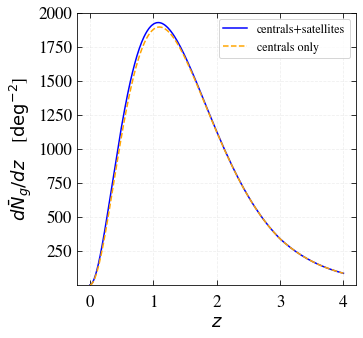

In [17]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')


In [25]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'blue'
})
M.compute()
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'green'
})
M.compute()
get_dNgdz_cat_green = np.vectorize(M.get_galaxy_number_counts)

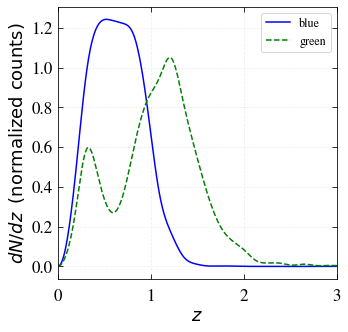

In [32]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')



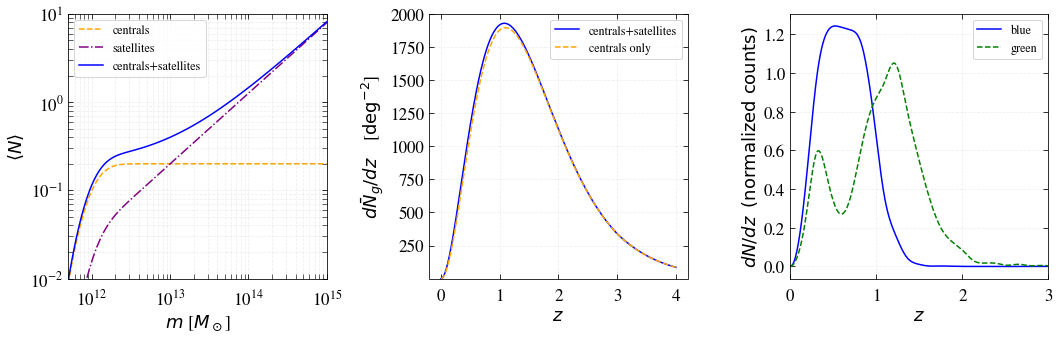

In [42]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('galaxies.pdf')



# Computing projected field ksz^2 x g

In [10]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-2
param_list = ['f_b_gas','A_alpha','A_beta']
param_fiducial_values = [0.15,0.88,3.83]

fac = 1.

In [11]:
M = Class()
M.set(ksz_params)
for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]})
M.compute()
cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 91.0220 seconds
computed in 92.0390 seconds
computed in 98.3812 seconds


[]

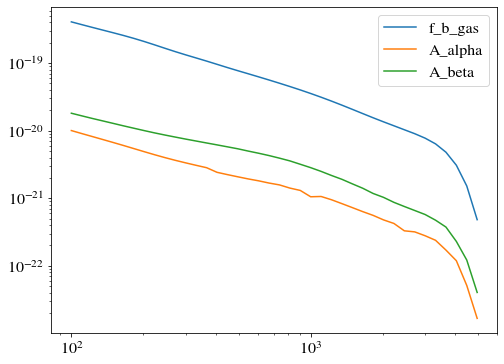

In [12]:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend()
plt.loglog()

[]

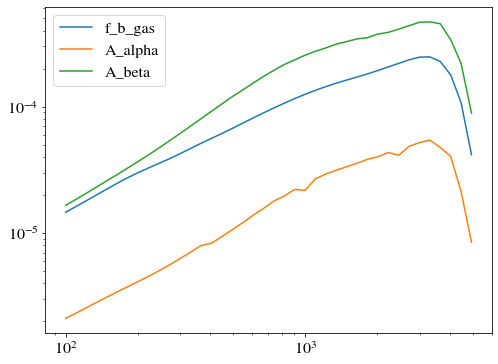

In [13]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),label=param_list[i])

plt.legend()
plt.loglog()

In [15]:
# data covariance matrix
fac_cov = 1.
covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)


In [3]:
import numpy as np
np.sqrt(6.04236e-43)

7.773261863593687e-22

In [4]:
np.sqrt(1.22271e-42)

1.1057621805795312e-21

In [16]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   


[0.00387586 0.11983074 0.05978225]


In [17]:
4.46204918e+02/4.e3

0.1115512295

In [18]:
np.save('planck_unwise_ttg_221121.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


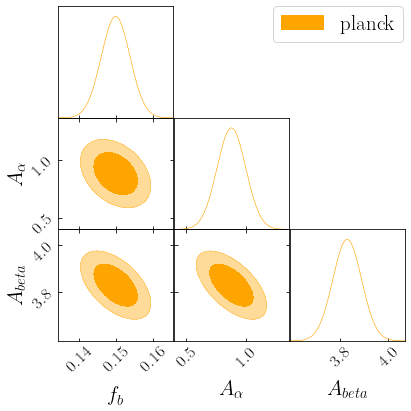

In [19]:
# plot ellipses
inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
# inverse_fisher_F_advact = np.load('advact_ttg_211121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
labels = [r'f_b', r'A_{\alpha}', 'A_{beta}']

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
# matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix1], 
                names,
            filled = True,
            legend_labels = ['planck','advact'], 
            contour_colors = ['orange','green'])

# Save triplot
#g.export('output_example.png')

$\beta$

# Computing projected field ksz^2 x g

In [23]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 64.7949 seconds


In [28]:
M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 300.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for ACT, 0.4 for SO and S4
'gas profile' : 'nfw',
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 59.7082 seconds
computed in 59.0839 seconds


Text(0.5, 1.0, 'agn')

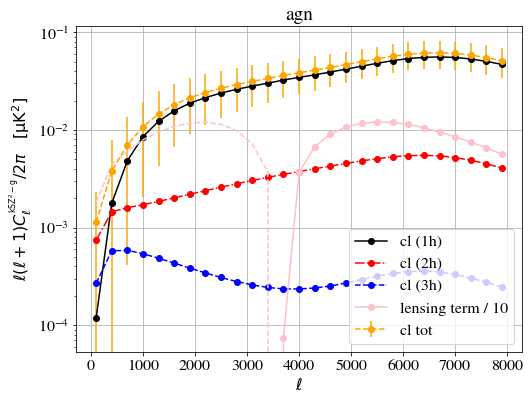

In [8]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('agn')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'agn')

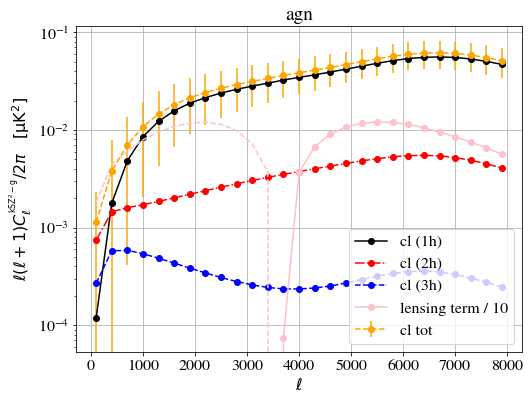

In [9]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('agn')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'shock')

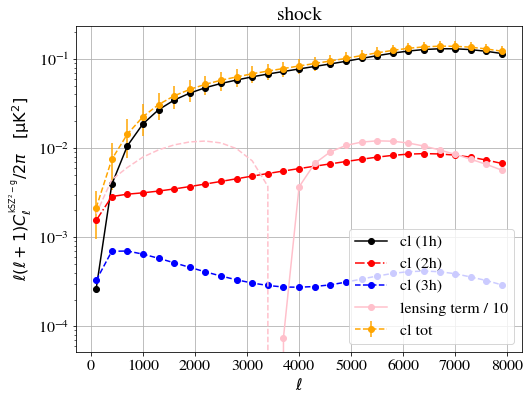

In [10]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('shock')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

Text(0.5, 1.0, 'nfw')

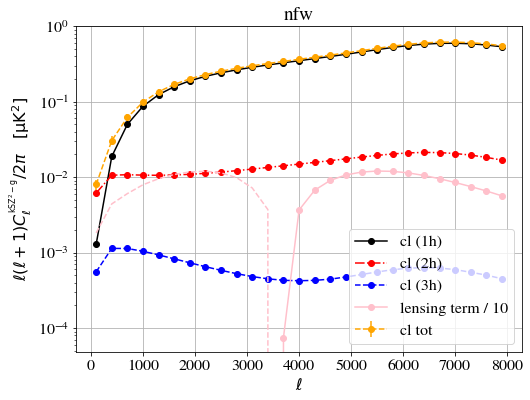

In [11]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')

plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
plt.title('nfw')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

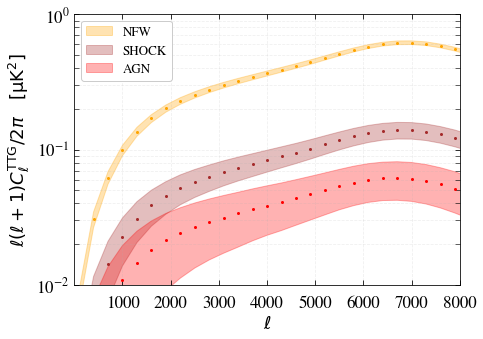

In [88]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'NFW',
             c='orange',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
                 label = 'NFW',
               alpha=0.3)

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'SHOCK',
             c='brown',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
                 label = 'SHOCK',
               alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         #label = 'AGN',
             c='red',ls='None',marker = 'o',markersize=2)

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
                 label = 'AGN',
               alpha=0.3)





plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
# plt.grid(which='both',alpha=0.3)
plt.ylim(1e-2,1)
plt.xlim(2.,8e3)
# plt.legend(loc=2)
# ax.axvspan(8e3, 18e3, alpha=0.1, color='grey',hatch="//")
# ax.axvspan(8e3, 18e3, alpha=0.1, color='None',edgecolor='grey',hatch="//")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
# plt.text(0.63,0.65,s='Noise dominated',rotation=90, transform=ax.transAxes,fontsize=14,c='k',alpha=0.7)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,framealpha=1,fontsize=13)
# plt.title('nfw')
fig.tight_layout()
plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

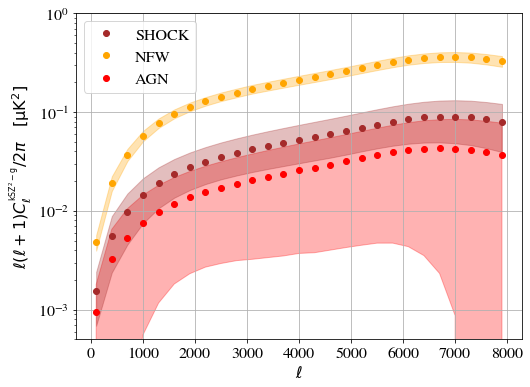

In [29]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'NFW',
             c='orange',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='orange',
               alpha=0.3)



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'AGN',
             c='red',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='red',
               alpha=0.3)




cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock.copy()
fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'SHOCK',
             c='brown',ls='None',marker = 'o')

plt.fill_between(cl_kSZ_kSZ_g['ell'],
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
               color='brown',
               alpha=0.3)



plt.yscale('log')
plt.xscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.ylim(5e-4,1)
plt.legend(loc=2)
# plt.title('nfw')
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

In [17]:
# signal-to-noise calculation:
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot/np.sqrt(covll)
                   
np.sum(snrl)

30.0608615359757

In [10]:
# signal-to-noise calculation:
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot/np.sqrt(covll)
                   
np.sum(snrl)

252.77055029443756

In [18]:
cl_tot

array([7.84038276e-20, 1.72494630e-20, 9.13716082e-21, 6.33418109e-21,
       4.82663834e-21, 3.87899409e-21, 3.20091171e-21, 2.69986359e-21,
       2.31813147e-21, 2.02803318e-21, 1.79516979e-21, 1.61430341e-21,
       1.46908056e-21, 1.35510352e-21, 1.25338849e-21, 1.17704841e-21,
       1.11533590e-21, 1.06482811e-21, 1.02348898e-21, 9.82568436e-22,
       9.35454873e-22, 8.78143893e-22, 8.10580569e-22, 7.35263845e-22,
       6.54822352e-22, 5.72712601e-22, 4.94982860e-22])

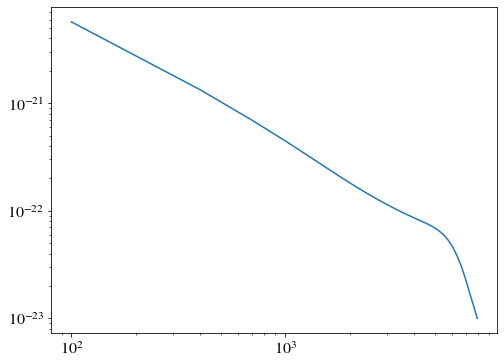

In [21]:
plt.loglog(cl_kSZ_kSZ_g['ell'],np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])))

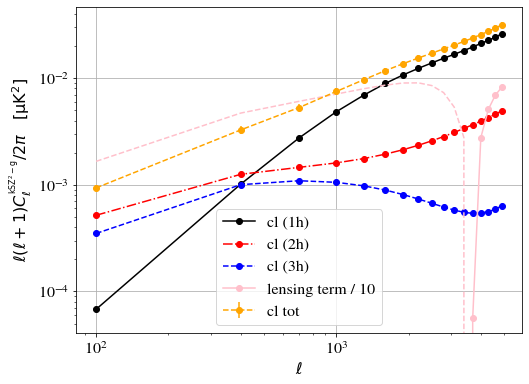

In [9]:

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)

plt.errorbar(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = 'cl tot',
             c='orange',ls='--',marker = 'o')
plt.loglog()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

In [51]:
cl_kSZ_kSZ_g['ell']

[100.0,
 400.0,
 700.0,
 1000.0,
 1300.0,
 1600.0,
 1900.0,
 2200.0,
 2500.0,
 2800.0,
 3100.0,
 3400.0,
 3700.0,
 4000.0,
 4300.0,
 4600.0,
 4900.0]

# Noise power spectrum

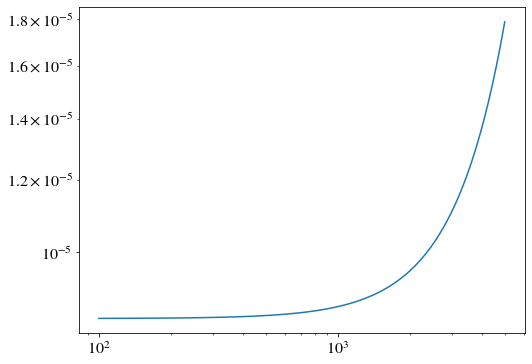

In [43]:
l_arr = np.geomspace(1e2,5e3,100)
arcmin_to_radians = np.pi/(60.*180.)
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
plt.loglog(l_arr,Nl)

# Computing  matter bispectrum B(k1,k2,k3) - equilateral

In [7]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [8]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = k1
  #mu = np.cos(0.6*np.pi)
  k3 = k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

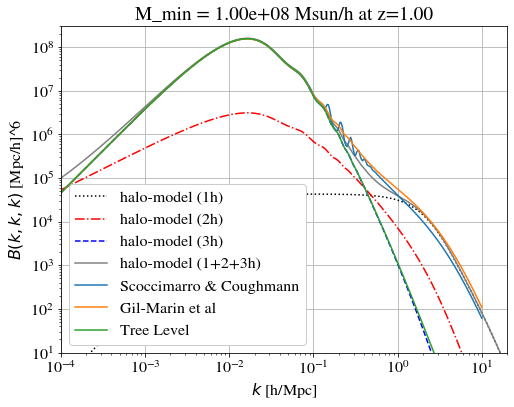

In [9]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - squeezed

In [11]:
lambda2 = 1.
lambda3 = 0.01

In [10]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [12]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

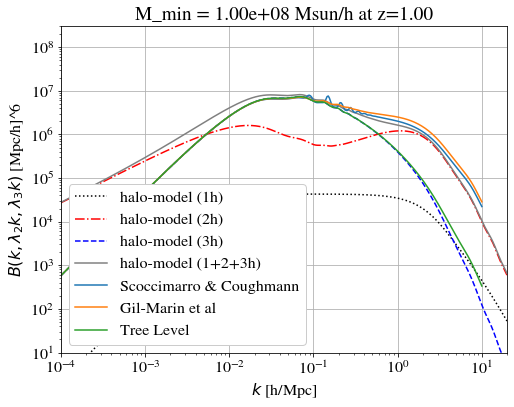

In [13]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - flattened

In [28]:
lambda2 = 0.5
lambda3 = 0.5

In [29]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [30]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

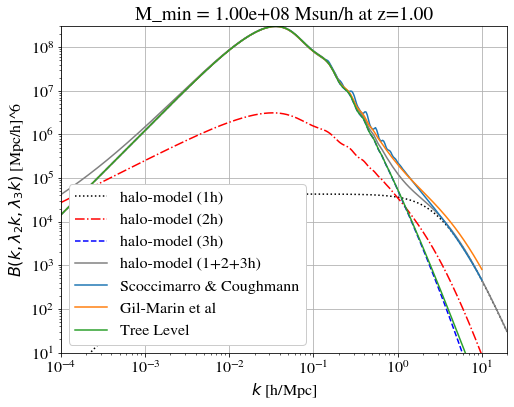

In [31]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - equilateral

In [14]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [15]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

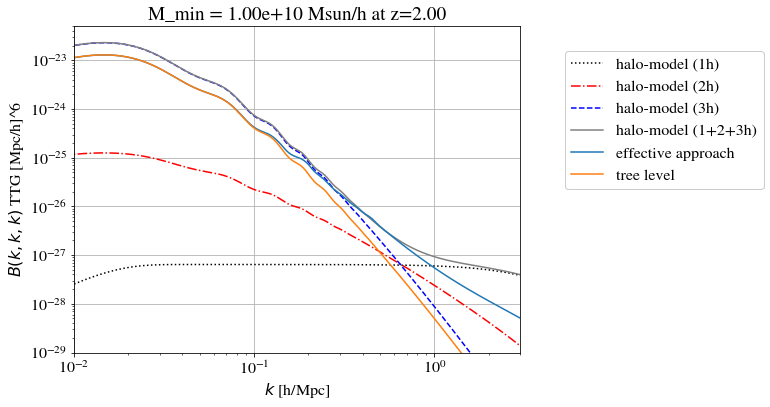

In [17]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - squeezed

In [18]:
lambda2 = 1.
lambda3 = 0.01

In [20]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [22]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

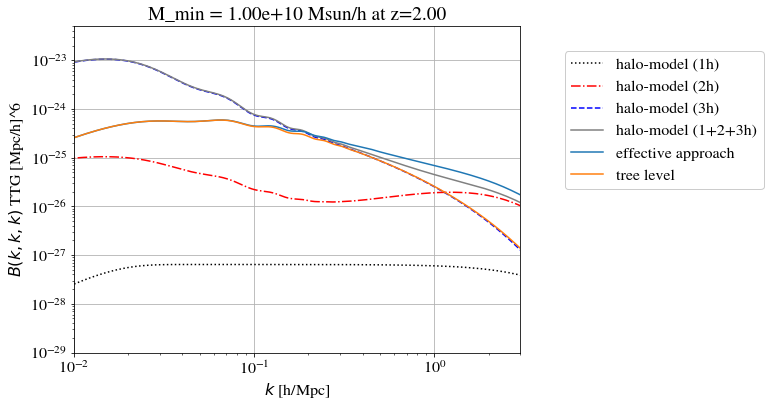

In [23]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - flattened

In [24]:
lambda2 = 0.5
lambda3 = 0.5

In [25]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [26]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

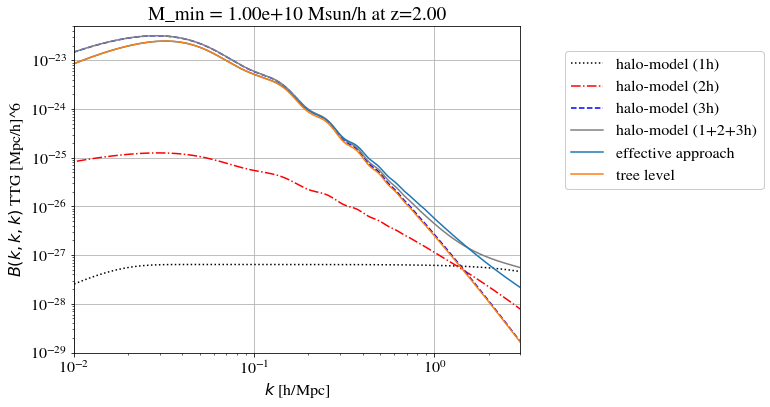

In [27]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

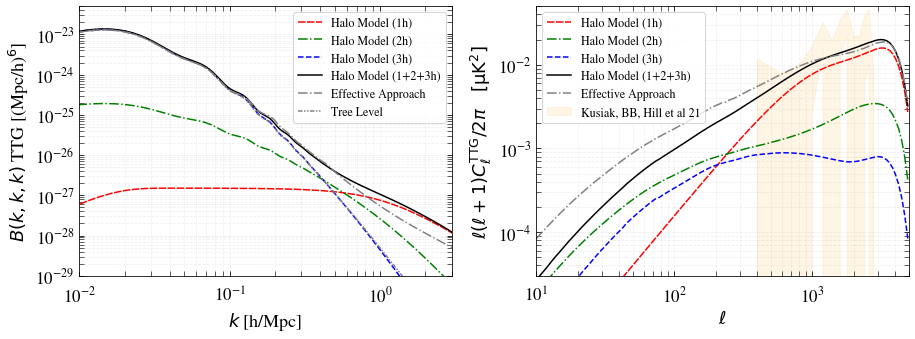

In [7]:
kSZ_kSZ_gal_1h_fft = []
kSZ_kSZ_gal_2h_fft = []
kSZ_kSZ_gal_3h_fft = []
kSZ_kSZ_gal_hf = []
multipoles = []
R = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/ksz2g_b16_agn_example.txt')
kSZ_kSZ_gal_1h_fft.append(R[:,54])
kSZ_kSZ_gal_2h_fft.append(R[:,55])
kSZ_kSZ_gal_3h_fft.append(R[:,56])
kSZ_kSZ_gal_hf.append(R[:,46])
multipoles.append(R[:,0])

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
id_p = 0
fac = (2.726e6)**2*multipoles[id_p]*(multipoles[id_p]+1.)/2./np.pi
ax.plot(multipoles[id_p],kSZ_kSZ_gal_1h_fft[id_p]*fac,
        c='r',ls=(0, (5, 1)),alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (1h)')
ax.plot(multipoles[id_p],kSZ_kSZ_gal_2h_fft[id_p]*fac,color='g',
        ls='-.',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (2h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_3h_fft[id_p])*fac,color='b',
        ls='--',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (3h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_1h_fft[id_p]*fac+kSZ_kSZ_gal_2h_fft[id_p]*fac+kSZ_kSZ_gal_3h_fft[id_p]*fac),
        color='k',
        ls='-',alpha = 1.,
        # label = val_label[id_p] + ' (3h)',
        label = 'Halo Model (1+2+3h)')#,
bgeff = 1
ax.plot(multipoles[id_p],kSZ_kSZ_gal_hf[id_p]*fac*bgeff,
        c='grey',ls='-.',
        label = 'Effective Approach')


Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
cell_ola_eff = Ola_eff[1,:]
ell_ola_eff = Ola_eff[0,:]
Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
err_cell_ola_measurements = Ola_measurements[2,:]
cell_ola_measurements = Ola_measurements[1,:]
ell_ola_measurements = Ola_measurements[0,:]

#ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

ax.fill_between(ell_ola_measurements,
                cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
                cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
            label='Kusiak, BB, Hill et al 21',
            color='orange',
            alpha=0.1)






ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(3e-5,5e-2)
ax.set_xlim(10,5e3)
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\ell$',size=title_size)
# ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
ax.set_xlabel(r"$k$ [h/Mpc]",size=title_size)
ax.set_ylabel(r"$B(k,k,k)$ TTG [(Mpc/h)$^6$]",size=title_size)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'Halo Model (1h)',c='r',ls=(0, (5, 1)))
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'Halo Model (2h)',c='g',ls='-.')
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'Halo Model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = 'Halo Model (1+2+3h)',
        c='k',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label='Effective Approach',alpha=1.,c='grey',ls='-.')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label='Tree Level',alpha=1.,c='grey',ls= (0, (3, 1, 1, 1, 1, 1)))





ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
ax.set_ylim(1e-29,5e-23)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
#plt.savefig("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/kSZ2g_b16_agn.pdf")

In [ ]:
#fiducial ksz params
'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
    
'n_z_psi_b1g' : 100,
'n_l_psi_b1g' : 400,

'n_z_psi_b2g' : 100,
'n_l_psi_b2g' : 400,

'n_z_psi_b2t' : 100,
'n_l_psi_b2t' : 400,

'n_z_psi_b1t' : 100,
'n_l_psi_b1t' : 100,

'n_z_psi_b1gt' : 100,
'n_l_psi_b1gt' : 100,

'N_samp_fftw' : 2000,
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,